In [46]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt

In [47]:
# Memanggil Data
dataset = pd.read_csv('/content/diabetes.csv')

In [48]:
# Isi dari dataset
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [49]:
# Ukuran dari dataset (baris, kolom)
dataset.shape

(768, 9)

In [50]:
# properti-properti statistikal dari dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [51]:
# Frekuensi masing-masing outcome
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [52]:
# Rerataan dari tiap kolom group by outcome
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [53]:
# Memisahkan table
X = dataset.drop(columns = 'Outcome', axis = 1)
Y = dataset['Outcome']

In [54]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Standarisasi Data

In [55]:
scaler = StandardScaler()
X = X.values
scaler.fit(X)
standarized_data = scaler.transform(X)

In [56]:
print(standarized_data)

[[ 0.639947  0.848324  0.149641 ...  0.204013  0.468492  1.425995]
 [-0.844885 -1.123396 -0.160546 ... -0.684422 -0.365061 -0.190672]
 [ 1.23388   1.943724 -0.263941 ... -1.103255  0.604397 -0.105584]
 ...
 [ 0.342981  0.003301  0.149641 ... -0.73519  -0.685193 -0.27576 ]
 [-0.844885  0.159787 -0.470732 ... -0.240205 -0.371101  1.170732]
 [-0.844885 -0.873019  0.046245 ... -0.202129 -0.473785 -0.871374]]


In [57]:
X = standarized_data

In [58]:
print(X)
print(Y)

[[ 0.639947  0.848324  0.149641 ...  0.204013  0.468492  1.425995]
 [-0.844885 -1.123396 -0.160546 ... -0.684422 -0.365061 -0.190672]
 [ 1.23388   1.943724 -0.263941 ... -1.103255  0.604397 -0.105584]
 ...
 [ 0.342981  0.003301  0.149641 ... -0.73519  -0.685193 -0.27576 ]
 [-0.844885  0.159787 -0.470732 ... -0.240205 -0.371101  1.170732]
 [-0.844885 -0.873019  0.046245 ... -0.202129 -0.473785 -0.871374]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Data Split


In [59]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 0.2, stratify =  Y, random_state = 2)


In [60]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training Model


In [61]:
classifier = svm.SVC(kernel='linear')

In [62]:
# X_train = X_train.values
Y_train = Y_train.values
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Performance Evaluation

In [63]:
# Accuracy score on the training data
X_train_predict = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, Y_train)

In [64]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [65]:
# Accuracy score on the test data
X_test_predict = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predict, Y_test)

In [66]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [67]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[91  9]
 [26 28]]


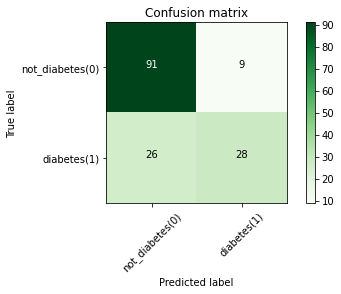

In [68]:
cnf_matrix = confusion_matrix(Y_test, X_test_predict, labels=[0,1])
np.set_printoptions(precision=6)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not_diabetes(0)','diabetes(1)'],normalize= False,  title='Confusion matrix')

In [69]:
print (classification_report(Y_test, X_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



Sistem Prediksi

In [70]:
input_data = (4,147,74,25,293,34.9,0.385,30)

# ubah jadi numpy array
input_data_np_arr = np.asanyarray(input_data)

# reshape
input_data_reshaped = input_data_np_arr.reshape(1,-1)

# standarisasi input
std_data = scaler.transform(input_data_reshaped)

prediction = classifier.predict(std_data)
# print(prediction)

if prediction[0] == 1:
  print("You are diagnosed with diabetes")
else:
  print("You aren't diagnosed with diabetes")

You aren't diagnosed with diabetes


In [71]:
input_data = (4,146,78,0,0,38.5,0.52,67)

# ubah jadi numpy array
input_data_np_arr = np.asanyarray(input_data)

# reshape
input_data_reshaped = input_data_np_arr.reshape(1,-1)

# standarisasi input
std_data = scaler.transform(input_data_reshaped)

prediction = classifier.predict(std_data)
# print(prediction)

if prediction[0] == 1:
  print("You are diagnosed with diabetes")
else:
  print("You aren't diagnosed with diabetes")

You are diagnosed with diabetes


Pickle


In [72]:
import pickle
filename = 'model-diabetes.pkl'
pickle.dump(classifier, open(filename, 'wb'))